# Predicting poisonous mushrooms using machine learning

This notebook looks into using various Python-based machine learning and data sciecne libraries in a attempt to build a machine learning model capable of predicting mushroom edibility based on different feature parameters.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem definition

> Given descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom, can we predict whether or not they are poisonous?

## 2. Data

The original data came from The Audubon Society Field Guide to North American Mushrooms (1981).

## 3. Evaluation

> If we can reach 95% accuracy at prediction whether or non a mushroom is edible, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in data.

**Create data dictionary**

Attribute Information: (classes: edible=e, poisonous=p)

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

4. bruises: bruises=t,no=f

5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

6. gill-attachment: attached=a,descending=d,free=f,notched=n

7. gill-spacing: close=c,crowded=w,distant=d

8. gill-size: broad=b,narrow=n

9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

10. stalk-shape: enlarging=e,tapering=t

11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

16. veil-type: partial=p,universal=u

17. veil-color: brown=n,orange=o,white=w,yellow=y

18. ring-number: none=n,one=o,two=t

19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside notebook
%matplotlib inline 

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [45]:
df= pd.read_csv('/Users/starburned/data_analytics_projects/data/Mushrooms/mushrooms.csv')

## Data Exploration (EDA)

The goal here is to find more about the data.

1. What question(s) are you trying to solve?
2. What kid of data do we have and how we do treat different types?
2. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
len(df)

8124

In [4]:
df.shape

(8124, 23)

In [6]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
# The atribute veil_type can be deleted because it only takes one value, the rest of attributes don't show any problem
df.drop("veil-type", axis=1, inplace= True)

In [10]:
# Target distribution
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

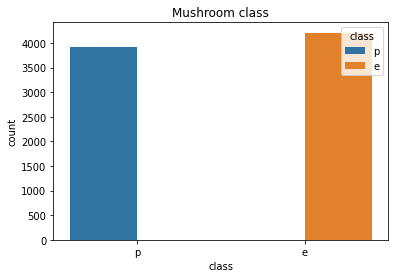

In [11]:
# Target distribution
sns.countplot(x="class", data= df, hue="class").set_title("Mushroom class");

### Exploring cap shapes feature and its impact on the target

![]('/Users/starburned/data_analytics_projects/data/Mushrooms/Mushroom_caps_resized.jpg')

In [12]:
df["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [13]:
df["cap-shape"].value_counts(normalize=True)

x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap-shape, dtype: float64

In [22]:
df["class"]

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

## Converting target to binomial

In [48]:
class_binomial = pd.get_dummies(df["class"])

In [49]:
class_binomial

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
8119,1,0
8120,1,0
8121,1,0
8122,0,1


In [50]:
class_binomial.drop(["e"],axis=1, inplace=True)

In [51]:
df["class_binomial"] = class_binomial

In [52]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_binomial
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0


In [53]:
df.groupby('cap-shape')['class_binomial'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
cap-shape,,
c,4,1.000000
k,828,0.724638
f,3152,0.493655
x,3656,0.467177
b,452,0.106195
s,32,0.000000


### Mushroom class according to cap-shape visualization

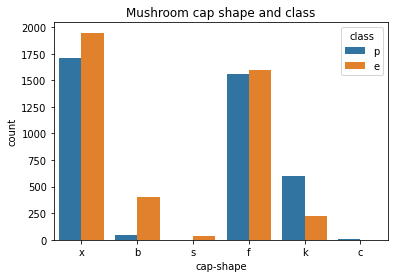

In [54]:
# Class according to cap-shape
sns.countplot(x="cap-shape", data= df, hue="class").set_title("Mushroom cap shape and class");

### Let's write a function that will plot countplots per class

In [15]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

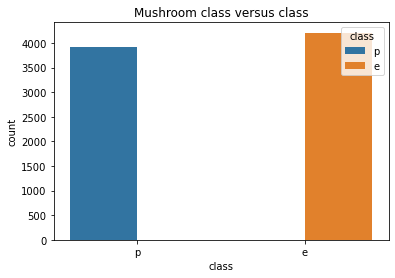

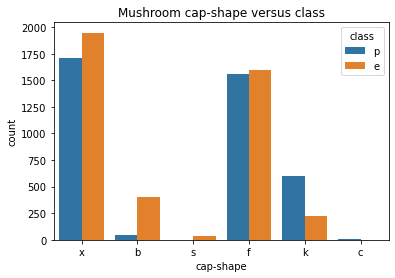

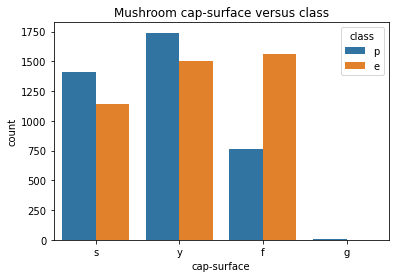

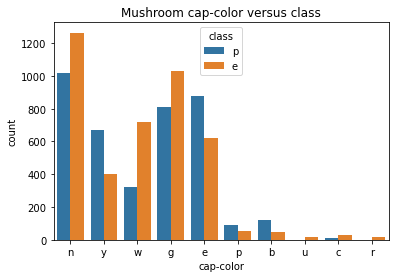

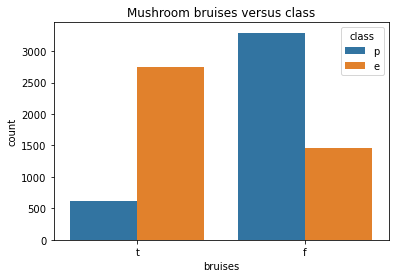

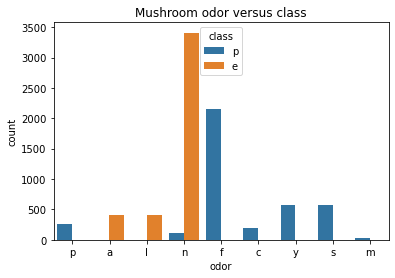

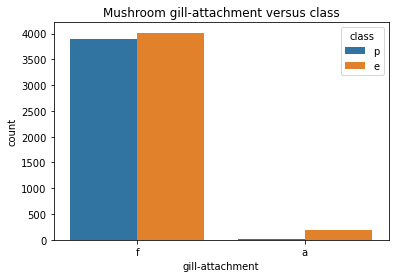

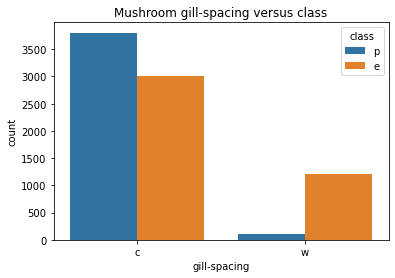

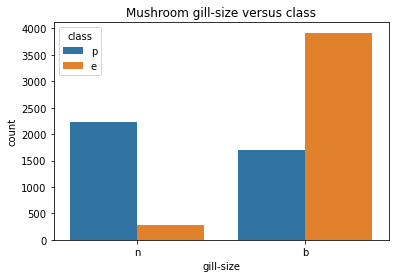

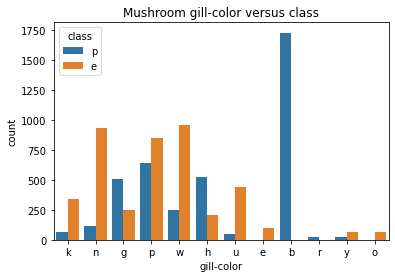

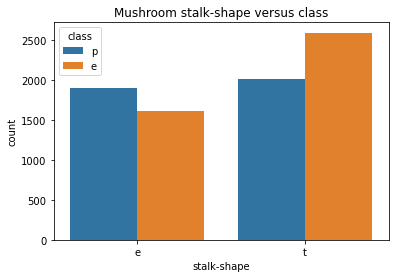

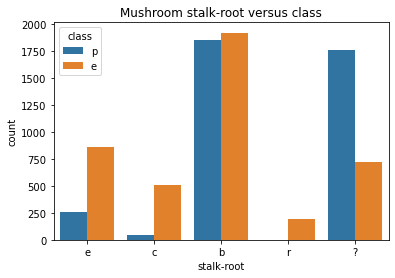

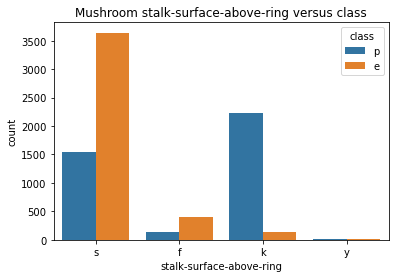

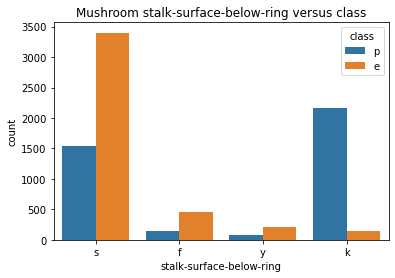

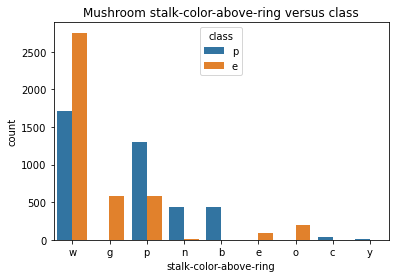

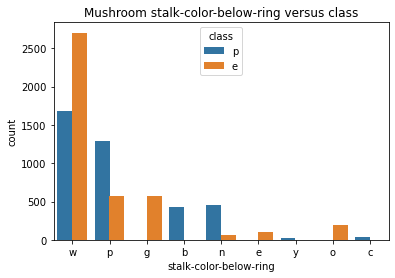

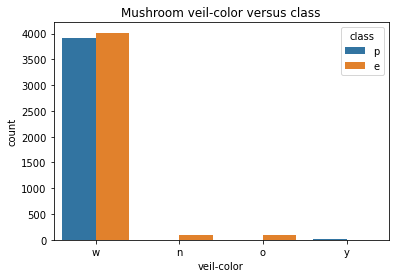

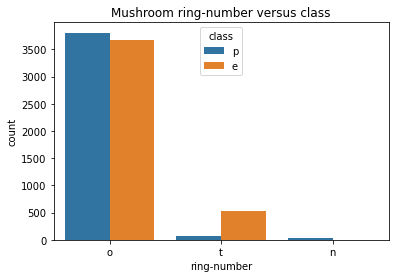

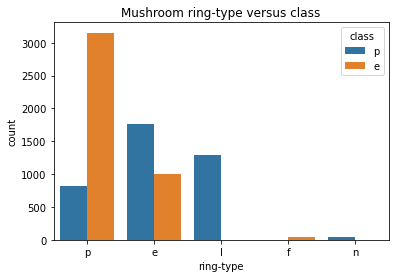

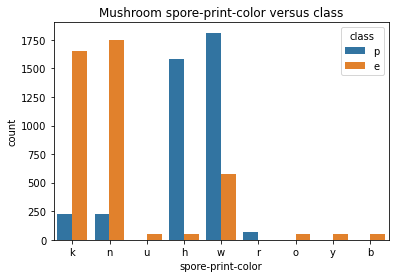

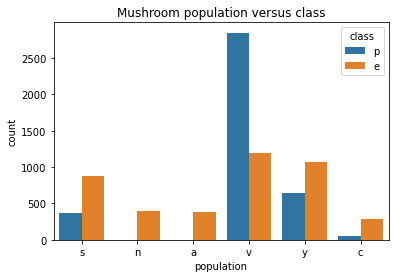

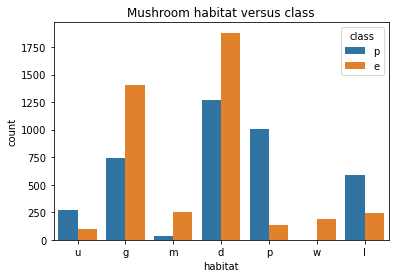

In [16]:
# Put columns to a list
l=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']   
for i in l:
    sns.countplot(x=i,data= df, hue="class").set_title("Mushroom " +str(i)+ " versus class");
    plt.show()

## X and y preparation

In [56]:
# Split into X & y and train/test
X = df.drop(["class", "class_binomial"],axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Encoding categorical features

All features that we have in the dataframe are categotical. In order to fit them to Radom Forest machine learning model we need to encode them to numerical.

In [57]:
lab = LabelEncoder()
for col in df.columns:

    df[col] = lab.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_binomial
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,1
1,0,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,0
2,0,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,0
3,1,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,1
4,0,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,0


In [58]:
# Split into X & y and train/test
X = df.drop(["class", "class_binomial"],axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
X[:3]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3


In [62]:
y[:3]

0    1
1    0
2    0
Name: class, dtype: int64

In [63]:
clf= RandomForestClassifier()

In [64]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
clf.score(X_test, y_test)

1.0

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it woulkd be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [66]:
# Make predictions with model
y_preds= clf.predict(X_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


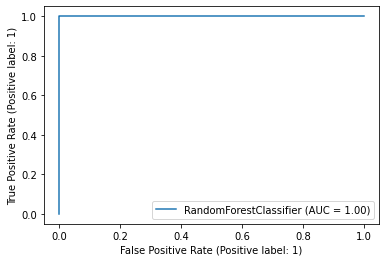

In [67]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test, y_test);

In [68]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[835   0]
 [  0 790]]


In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.00      1.00      1.00       790

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score().`

In [71]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.84246154, 1.        , 0.99876923, 1.        , 0.61453202])

In [72]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8911525577870405

In [73]:
# Cross-validated Precision
cv_precision = cross_val_score(clf, X, y, scoring= "precision")
cv_precision= np.mean(cv_precision)
cv_precision

0.9158284023668639

In [74]:
# Cross-validated Recall
cv_recall = cross_val_score(clf, X, y, scoring= "recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9341830218677509

In [75]:
# Cross-validated f-1
cv_f1 = cross_val_score(clf, X, y, scoring= "f1")
cv_f1= np.mean(cv_f1)
cv_f1

0.9073307499430134

## Feature Importance

Feature importance is another as asking, "which features contributed most to the otcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.
Let's find the feature importance for our  model.

In [96]:
clf.feature_importances_

array([0.00532112, 0.0118854 , 0.01455332, 0.05066326, 0.18495856,
       0.00414083, 0.03517806, 0.13936772, 0.09700538, 0.02003678,
       0.05414826, 0.04524349, 0.05304693, 0.00917747, 0.01731825,
       0.        , 0.00271827, 0.01317889, 0.04659425, 0.10751347,
       0.06045625, 0.02749405])

In [77]:
# Match coef's of features to columns
feature_dict= dict(zip(X.columns, list(clf.feature_importances_)))

In [78]:
feature_dict

{'cap-shape': 0.0022785433664378333,
 'cap-surface': 8.660974598625271e-05,
 'cap-color': 0.0006782749478417412,
 'bruises': 0.0004634920842468517,
 'odor': 0.00029950593389743436,
 'gill-attachment': 0.001137311494295943,
 'gill-spacing': 0.003966308918710312,
 'gill-size': 0.0002956042412271154,
 'gill-color': 0.0055574601236513055,
 'stalk-shape': 0.0027191680135867195,
 'stalk-root': 0.0032206006959786364,
 'stalk-surface-above-ring': 0.0003353035173846509,
 'stalk-surface-below-ring': 0.0007025915398056546,
 'stalk-color-above-ring': 0.002235161293959334,
 'stalk-color-below-ring': 0.0011047836108195662,
 'veil-type': 0.0017991774707909172,
 'veil-color': 0.0003394077950496359,
 'ring-number': 0.0001327364222002372,
 'ring-type': 0.002206177076038588,
 'spore-print-color': 0.004063478233243623,
 'population': 0.033327615900401876,
 'habitat': 0.028424333374027215}

In [91]:
feature_dict

{'cap-shape': 0.005321124716294211,
 'cap-surface': 0.011885399192949129,
 'cap-color': 0.014553321156328089,
 'bruises': 0.050663256975921916,
 'odor': 0.1849585602553899,
 'gill-attachment': 0.0041408264484622415,
 'gill-spacing': 0.03517805793053388,
 'gill-size': 0.13936772197389483,
 'gill-color': 0.09700538092492182,
 'stalk-shape': 0.020036776199761235,
 'stalk-root': 0.05414826035069798,
 'stalk-surface-above-ring': 0.04524349397813464,
 'stalk-surface-below-ring': 0.05304692737382128,
 'stalk-color-above-ring': 0.00917747166761463,
 'stalk-color-below-ring': 0.017318250880332304,
 'veil-type': 0.0,
 'veil-color': 0.002718267367957164,
 'ring-number': 0.013178888414360967,
 'ring-type': 0.046594248225983716,
 'spore-print-color': 0.10751346631936934,
 'population': 0.060456253311351675,
 'habitat': 0.027494046335919124}

In [109]:
fi = pd.DataFrame.from_dict(feature_dict, orient = 'index', columns=['fi'])

In [110]:
fi

,fi
cap-shape,0.005321
cap-surface,0.011885
cap-color,0.014553
bruises,0.050663
odor,0.184959
gill-attachment,0.004141
gill-spacing,0.035178
gill-size,0.139368
gill-color,0.097005
stalk-shape,0.020037


In [111]:
fi.sort_values('fi',ascending=False)

,fi
odor,0.184959
gill-size,0.139368
spore-print-color,0.107513
gill-color,0.097005
population,0.060456
stalk-root,0.054148
stalk-surface-below-ring,0.053047
bruises,0.050663
ring-type,0.046594
stalk-surface-above-ring,0.045243


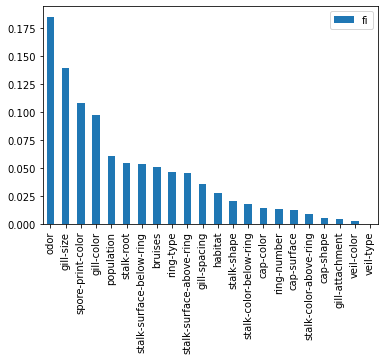

In [113]:
fi.sort_values('fi',ascending=False).plot(kind='bar');